In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


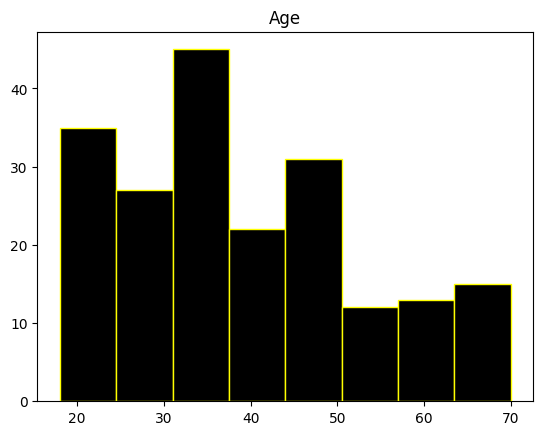

In [26]:
plt.hist(x = df['Age'], bins = 8, color = 'black', edgecolor='yellow')
plt.title('Age')
plt.show()

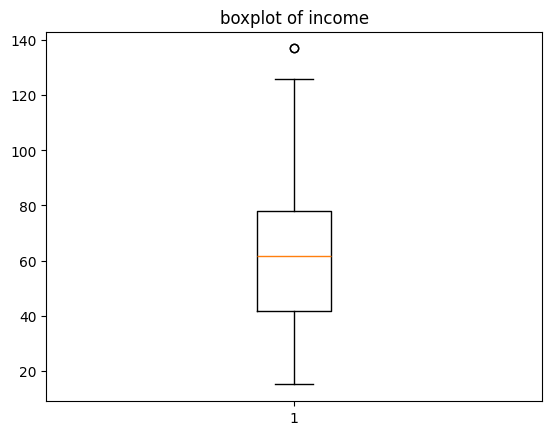

In [ ]:
plt.boxplot(x = df['Annual Income (k$)'])
plt.title('boxplot of income')
plt.show()

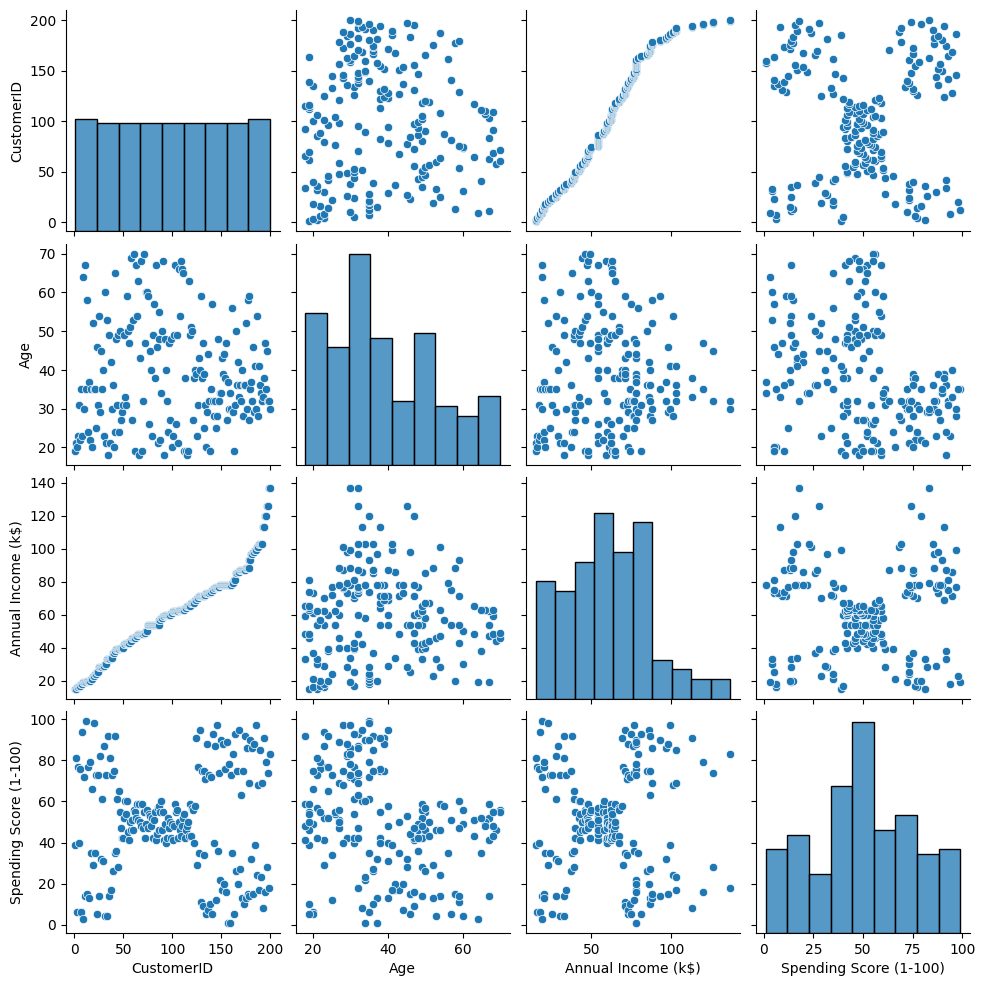

In [27]:
sns.pairplot(data=df)
plt.show()

In [16]:
df['Genre'].replace(to_replace=['Male', 'Female'], value = [0, 1], inplace= True)
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,-1.424569,-1.738999,-0.434801
1,2,0,-1.281035,-1.738999,1.195704


In [7]:
from sklearn.preprocessing import StandardScaler

In [15]:
scalar = StandardScaler()
df.loc[:, 'Age': 'Spending Score (1-100)'] = scalar.fit_transform(df.loc[:, 'Age' : 'Spending Score (1-100)'])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,-1.424569,-1.738999,-0.434801
1,2,0,-1.281035,-1.738999,1.195704
2,3,1,-1.352802,-1.700830,-1.715913
3,4,1,-1.137502,-1.700830,1.040418
4,5,1,-0.563369,-1.662660,-0.395980


In [17]:
from sklearn.cluster import KMeans

elbow method for finding the optimal number of clusters.

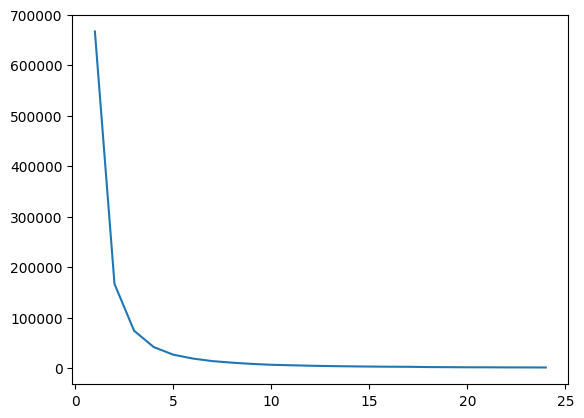

In [44]:
inertia_list = []
for k in range(1,25):
   model = KMeans(n_clusters = k, random_state=0)
   df_kmeans = model.fit(df)
   inertia = df_kmeans.inertia_
   inertia_list.append(inertia)

plt.plot(range(1,25), inertia_list)
plt.show()


k is chosen as 3.

In [45]:
model = KMeans(n_clusters = 3)
df_kmeans = model.fit(df)


In [47]:
from sklearn.metrics import silhouette_score

In [51]:
score = silhouette_score(df, labels =  df_kmeans.labels_)
score

0.5806657530304483

Interpreting Clusters

In [52]:
df['cluster_labels'] = df_kmeans.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_labels
0,1,0,-1.424569,-1.738999,-0.434801,0
1,2,0,-1.281035,-1.738999,1.195704,0
2,3,1,-1.352802,-1.700830,-1.715913,0
3,4,1,-1.137502,-1.700830,1.040418,0
4,5,1,-0.563369,-1.662660,-0.395980,0


In [54]:
df.groupby(by = 'cluster_labels').median()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
cluster_labels,,,,,
0,33.5,1.0,-0.276302,-1.051949,0.050468
1,166.5,1.0,-0.348068,0.951946,0.050468
2,99.5,1.0,0.297832,0.016795,-0.046586


<Axes: xlabel='cluster_labels', ylabel='Annual Income (k$)'>

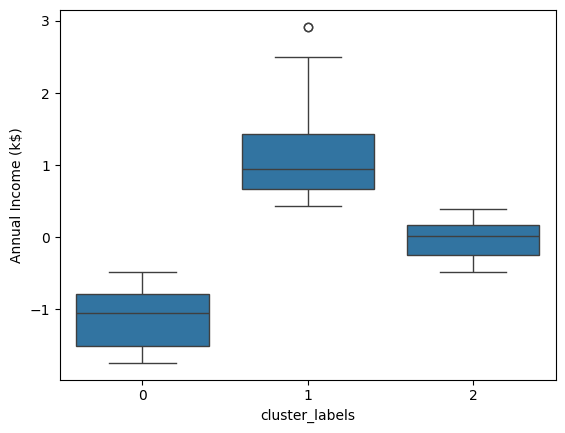

In [61]:
sns.boxplot(df, x= 'cluster_labels', y= 'Annual Income (k$)')
#sns.boxplot(df, x= 'cluster_labels', y= 'Spending Score (1-100)')



Based on distribution of 'Annual income' across clusters, this feature played the significant role 
in clustering. next step: comparing size of each cluster.

In [62]:
df['cluster_labels'].value_counts()

cluster_labels
1    68
0    66
2    66
Name: count, dtype: int64

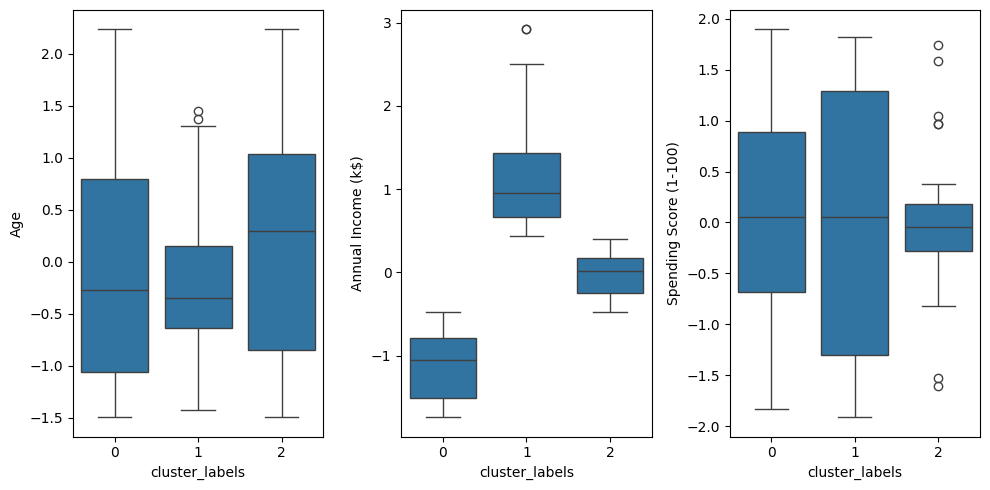

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
sns.boxplot(data=df, x='cluster_labels', y='Age', ax =axes[0])
sns.boxplot(data=df, x='cluster_labels', y='Annual Income (k$)', ax= axes[1])
sns.boxplot(data=df, x='cluster_labels', y='Spending Score (1-100)', ax=axes[2])

plt.tight_layout()
plt.show()


Interpretation of Cluster Meaning: Different conclusions can be drawn. the most obvious is that people with the highest 
income spend so differently across a wide range.

visualization of clusters with PCA method

In [70]:
from sklearn.decomposition import PCA

In [79]:
D_model = PCA(n_components=2)
df_pca = D_model.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns = ['pca1', 'pca2'])
df_pca['cluster_labels'] = df['cluster_labels']

<Axes: xlabel='pca1', ylabel='pca2'>

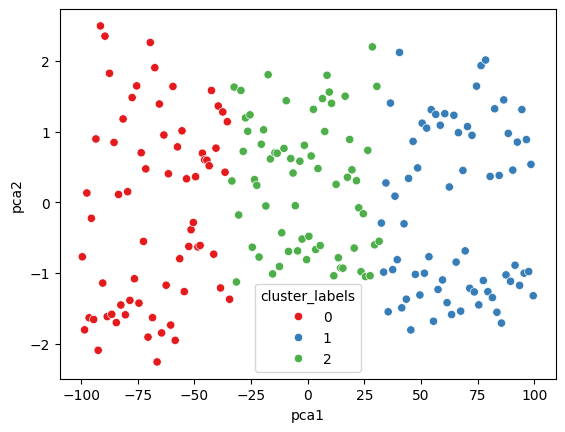

In [80]:
sns.scatterplot(data=df_pca, x='pca1', y='pca2', hue='cluster_labels', palette='Set1')